[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/11_diffusion/heat_equation_random_walk_fixedBC.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Define the number of grid points
m = 21
# Define the grid
x = np.linspace(-15, 15, m)
# Initial condition
y0 = np.exp(-(x/5)**2)
N = np.floor(y0*1.e6)
# Create an array for storing all snapshots
niters = 10
allN = np.empty((N.shape[0],int(niters+1)))
# Store the I.C.
allN[:,0] = N

In [3]:
for it in range(niters):
    N2 = np.zeros(m)
    for i in range(len(x)):
        for particles in range(int(N[i])):
            r = np.random.rand();
            # Equal probability to go left and right
            # The boundary conditions are no flux
            if r < 0.5: 
                if i > 0:
                    N2[i-1] = N2[i-1] + 1
                else:
                    # Bounce back from the wall
                    N2[i] = N2[i] + 1
            if r >= 0.5:
                if i < m-1:
                    N2[i+1] = N2[i+1] + 1
                else:
                    # Bounce back from the wall
                    N2[i] = N2[i] + 1
    # Now allow for enough flux so that the end points are fixed
    N2[0] = N[0]
    N2[-1] = N[-1]
    N = N2.copy()
    # Store the solution for animation
    allN[:,it+1] = N

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

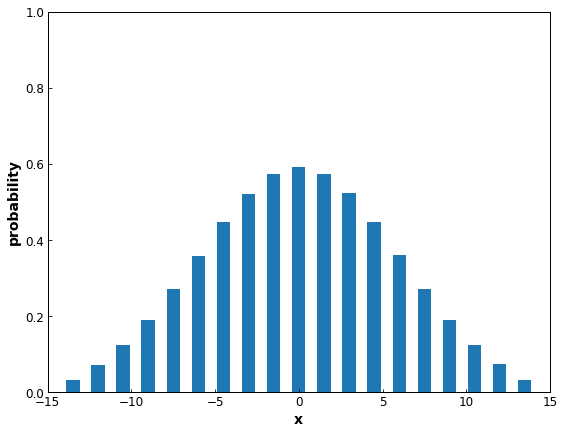

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot simulation result at the last iteration
ax.bar(x, allN[:,-1]/1.e6)

# Set axes labels and legend
ax.set_xlim([-15,15])
ax.set_ylim([0,1])
ax.set_xlabel(r'$x$')
ax.set_ylabel('probability')

plt.show()

In [6]:
def plot_solution(x, y, ax):
    sol = ax.bar(x, y, color='C0')
    return sol
    
def update_solution(sol, x, y, ax):
    for bar in ax.containers:
        bar.remove()
    ax.bar(x, y, color='C0')

def animate_solution(x, z):
    # Each column of z represents a snapshot
    # Initialize plot 
    fig, ax = plt.subplots(1,1,figsize=(9,7))
    # Initial state
    sol = plot_solution(x, z[:,0], ax)
    
    ax.set_xlim([-15,15])
    ax.set_ylim([0,1])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel('probability')

    def animate(i):
        '''Plot updates for animation'''
        fr = i
        update_solution(sol, x, z[:,i], ax)
        ax.set_title(r'$t = %i \Delta t$' % (i))
        return sol

    ani = animation.FuncAnimation(fig, animate, frames=z.shape[1], interval=300, blit=True)
    plt.close(fig)
    
    return ani

In [7]:
ani = animate_solution(x, allN/1.e6)
HTML(ani.to_html5_video())

In [8]:
# Uncomment to save animation as gif
# ani.save('animate_solution.gif', writer='pillow', fps=10)